In [ ]:
from Bio import SeqIO
import pandas as pd
def parse_cdhit_output(file_path):
    clusters = {}
    current_cluster = None

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith(">Cluster"):
                current_cluster = line.split(" ")[1]
                clusters[current_cluster] = []
            elif current_cluster is not None and line:
                if '>' in line:
                    try:
                        seq_info = line.split(",")[1] if ',' in line else line
                        seq_id_part = seq_info.split(">")[1]
                        seq_id = seq_id_part.split("...")[0].strip()
                        if seq_id:
                            clusters[current_cluster].append(seq_id)
                    except Exception as e:
                        print(f"Error parsing line: {line}\n{e}")
    return clusters

def load_fasta_sequences(fasta_path):
    seq_dict = {}
    for record in SeqIO.parse(fasta_path, "fasta"):
        core_id = record.id 
        seq_dict[core_id] = str(record.seq)  
    return seq_dict

def build_sequences_list(clusters, seq_dict):
    sequences = []
    data = []
    for cluster_id, seq_ids in clusters.items():
        for seq_id in seq_ids:
            seq = seq_dict.get(seq_id, "")
            if seq == "":
                print(f"Warning: Sequence ID '{seq_id}' not found in FASTA file.")
            data.append({'Cluster': cluster_id, 'Sequence ID': seq_id})
            sequences.append(seq)
    df = pd.DataFrame(data)
    return df, sequences

def build_sequences_list(clusters, seq_dict):
    sequences = []
    data = []
    for cluster_id, seq_ids in clusters.items():
        for seq_id in seq_ids:
            seq = seq_dict.get(seq_id, "")
            if seq == "":
                print(f"Warning: Sequence ID '{seq_id}' not found in FASTA file.")
            data.append({'Cluster': cluster_id, 'Sequence ID': seq_id})
            sequences.append(seq)
    df = pd.DataFrame(data)
    return df, sequences

if __name__ == "__main__":
    cluster_file = "cluster_validadas.txt" 
    fasta_file = "validated_RBP.fasta"         
    
    clusters = parse_cdhit_output(cluster_file)
    seq_dict = load_fasta_sequences(fasta_file)
    df, sequences = build_sequences_list(clusters, seq_dict)

    print(f"Total sequences parsed: {len(sequences)}")
    
    df.to_csv("clustered_sequences0.csv", index=False)



Total sequences parsed: 62


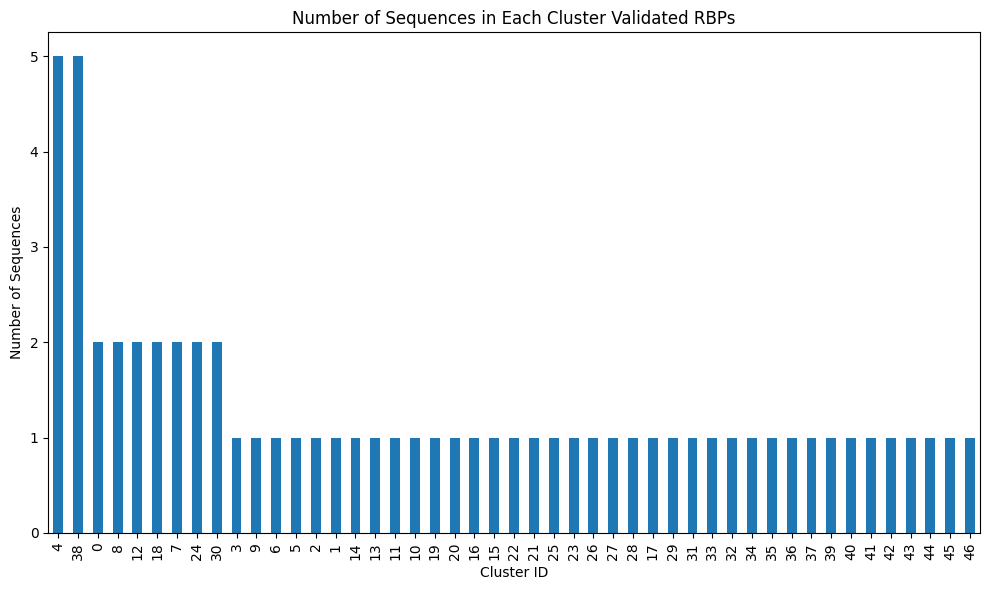

In [84]:
import matplotlib.pyplot as plt

cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Number of Sequences in Each Cluster Validated RBPs')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Sequences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


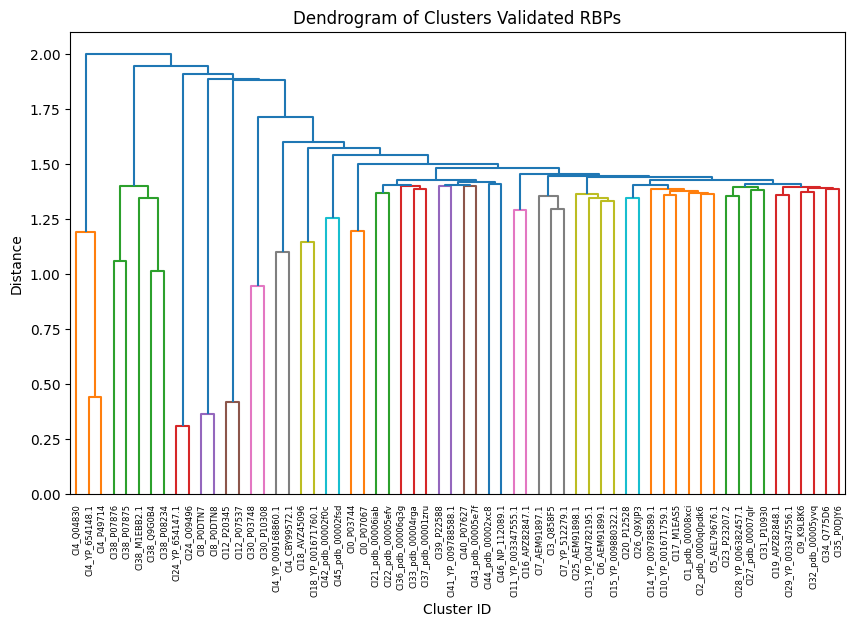

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the sequences using TF-IDF
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 4))
X = vectorizer.fit_transform(sequences) 
# Create a linkage matrix using the actual feature matrix
Z = linkage(X.toarray(), method='ward')  
# Plotting the dendrogram
plt.figure(figsize=(10, 6))

labels = df.apply(lambda row: f"Cl{row['Cluster']}_{row['Sequence ID']}", axis=1).values
dendrogram(Z, labels=labels)
plt.title('Dendrogram of Clusters Validated RBPs')
plt.xlabel('Cluster ID')
plt.ylabel('Distance')
plt.show()

In [95]:
from Bio import SeqIO
import pandas as pd
def parse_cdhit_output(file_path):
    clusters = {}
    current_cluster = None

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith(">Cluster"):
                current_cluster = line.split(" ")[1]
                clusters[current_cluster] = []
            elif current_cluster is not None and line:
                if '>' in line:
                    try:
                        seq_info = line.split(",")[1] if ',' in line else line
                        seq_id_part = seq_info.split(">")[1]
                        seq_id = seq_id_part.split("...")[0].strip()
                        if seq_id:
                            clusters[current_cluster].append(seq_id)
                    except Exception as e:
                        print(f"Error parsing line: {line}\n{e}")
    return clusters

def load_fasta_sequences(fasta_path):
    seq_dict = {}
    for record in SeqIO.parse(fasta_path, "fasta"):
        core_id = record.id  
        seq_dict[core_id] = str(record.seq)  
    return seq_dict


def build_sequences_list(clusters, seq_dict):
    sequences = []
    data = []
    for cluster_id, seq_ids in clusters.items():
        for seq_id in seq_ids:
            seq = seq_dict.get(seq_id, "")
            if seq == "":
                print(f"Warning: Sequence ID '{seq_id}' not found in FASTA file.")
            data.append({'Cluster': cluster_id, 'Sequence ID': seq_id})
            sequences.append(seq)
    df = pd.DataFrame(data)
    return df, sequences

def build_sequences_list(clusters, seq_dict):
    sequences = []
    data = []
    for cluster_id, seq_ids in clusters.items():
        for seq_id in seq_ids:
            seq = seq_dict.get(seq_id, "")
            if seq == "":
                print(f"Warning: Sequence ID '{seq_id}' not found in FASTA file.")
            data.append({'Cluster': cluster_id, 'Sequence ID': seq_id})
            sequences.append(seq)
    df = pd.DataFrame(data)
    return df, sequences

if __name__ == "__main__":
    cluster_file = "cluster_both.txt"  
    fasta_file = "unique_phage_proteins1.fasta"          

    clusters = parse_cdhit_output(cluster_file)
    seq_dict = load_fasta_sequences(fasta_file)
    df, sequences = build_sequences_list(clusters, seq_dict)

    print(f"Total sequences parsed: {len(sequences)}")
    df.to_csv("clustered_sequences1.csv", index=False)



Total sequences parsed: 998


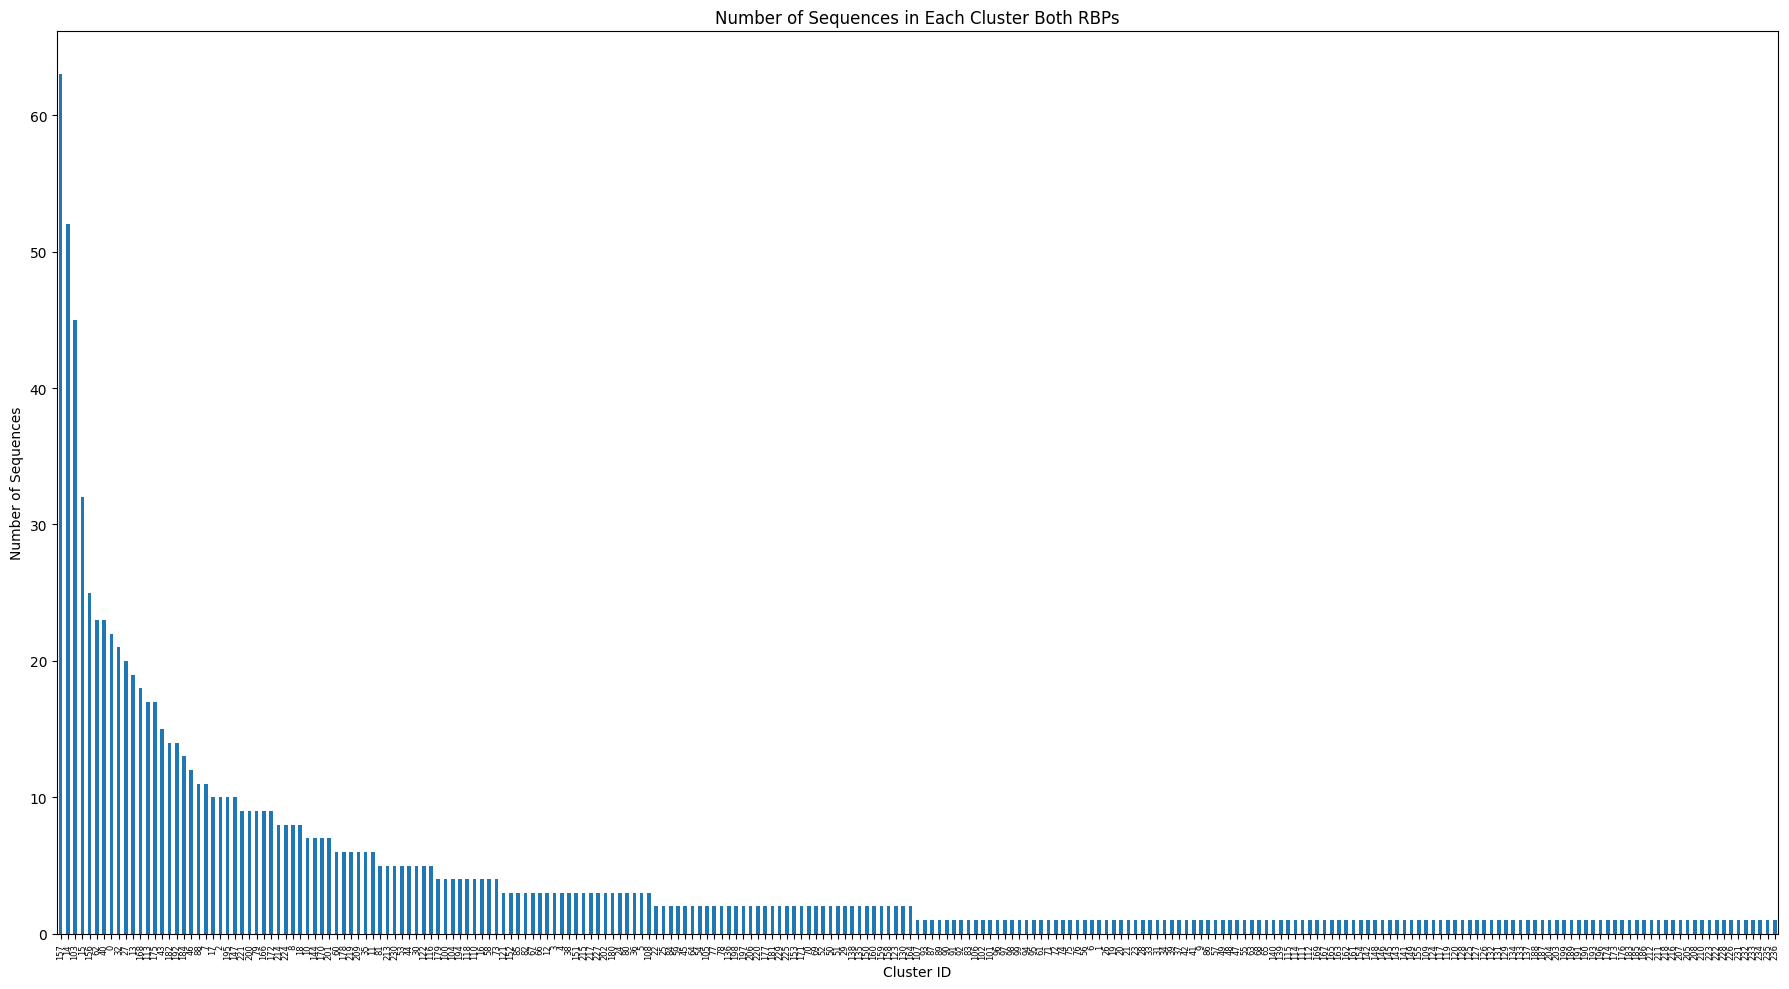

In [96]:
import matplotlib.pyplot as plt

cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(18, 10))
cluster_counts.plot(kind='bar')
plt.title('Number of Sequences in Each Cluster Both RBPs')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Sequences')
plt.xticks(rotation=90, size=6)
plt.tight_layout()
plt.show()


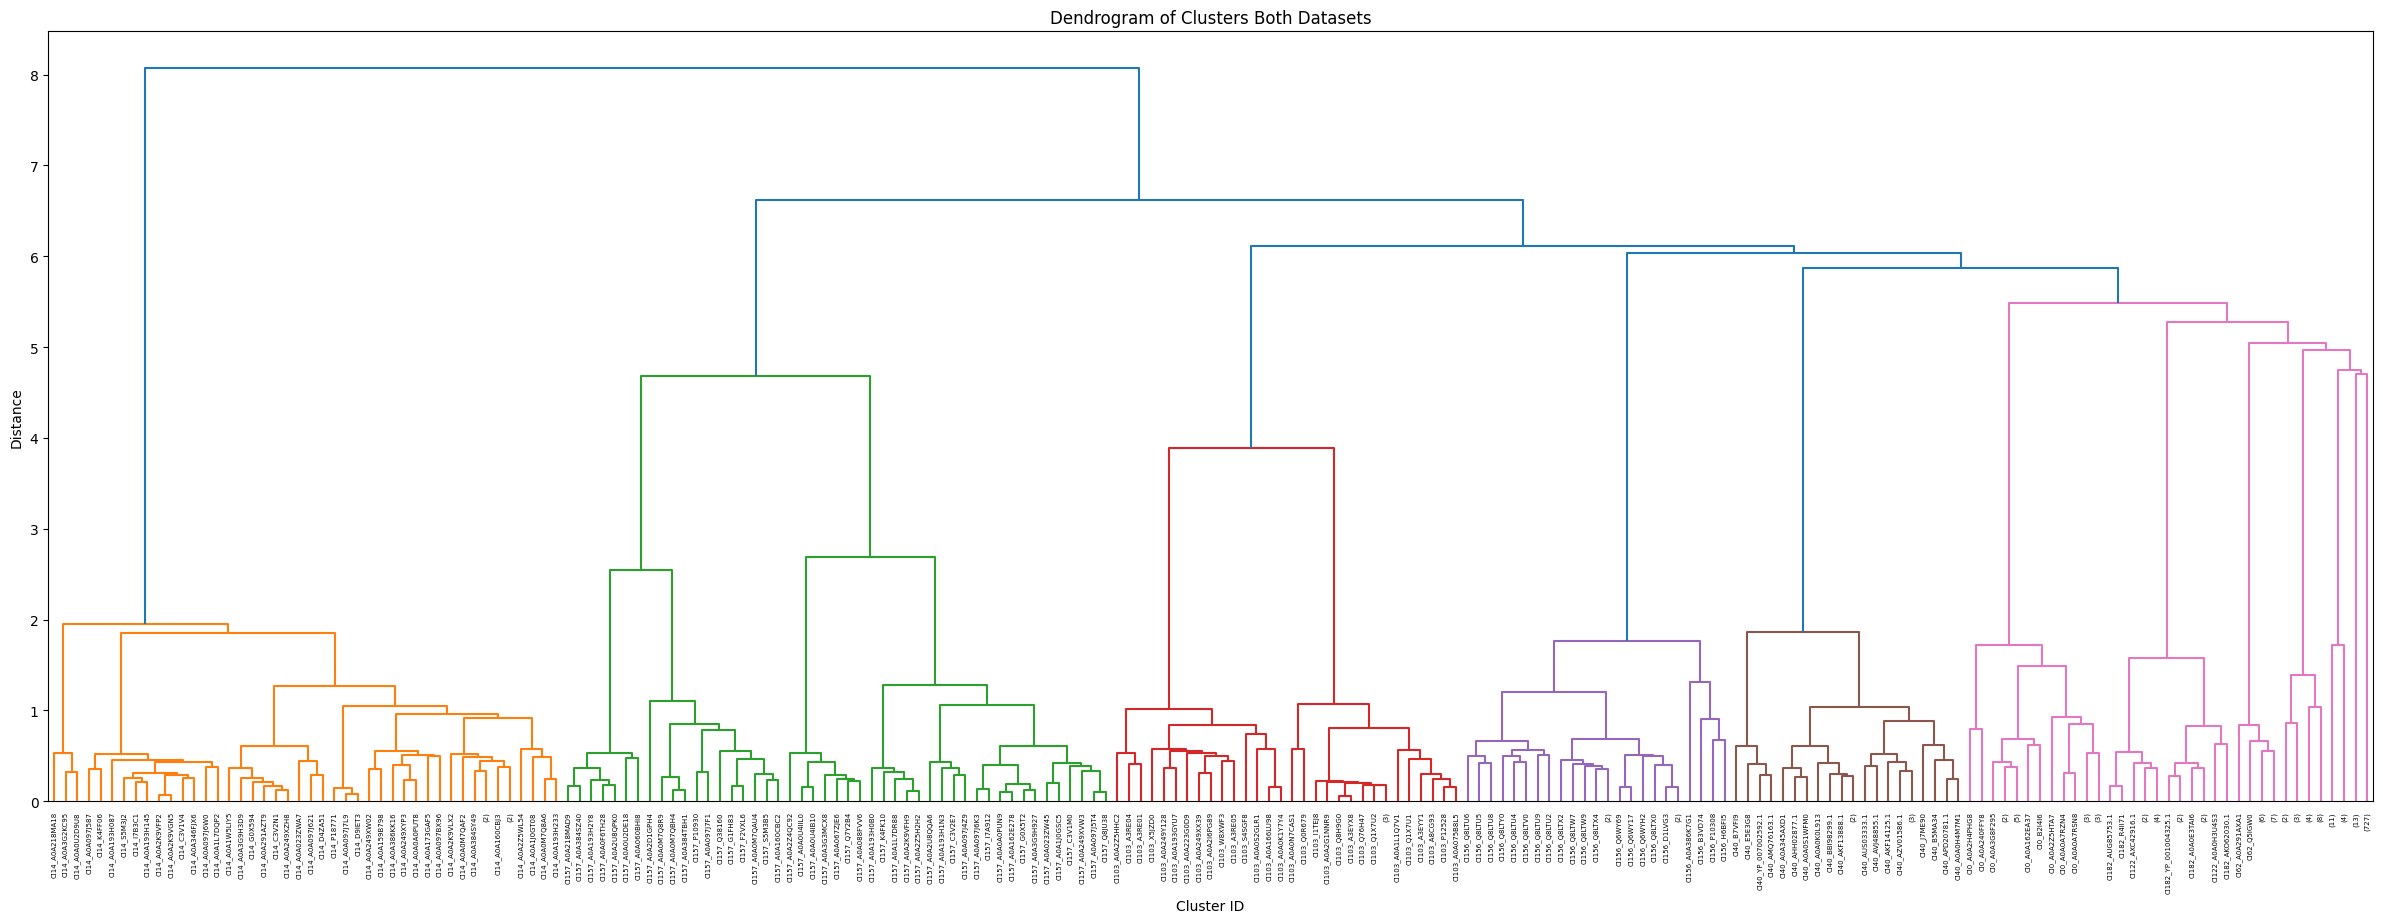

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 4))
X = vectorizer.fit_transform(sequences) 
Z = linkage(X.toarray(), method='ward')  

plt.figure(figsize=(30, 10))
labels = df.apply(lambda row: f"Cl{row['Cluster']}_{row['Sequence ID']}", axis=1).values
dendrogram(Z, labels=labels, truncate_mode='level', p=10, leaf_rotation=90)
plt.xticks(rotation=90, size=5)
plt.title('Dendrogram of Clusters Both Datasets')
plt.xlabel('Cluster ID')
plt.ylabel('Distance')
plt.show()

In [91]:
from Bio import SeqIO
import pandas as pd
def parse_cdhit_output(file_path):
    clusters = {}
    current_cluster = None

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith(">Cluster"):
                current_cluster = line.split(" ")[1]
                clusters[current_cluster] = []
            elif current_cluster is not None and line:
                if '>' in line:
                    try:
                        seq_info = line.split(",")[1] if ',' in line else line
                        seq_id_part = seq_info.split(">")[1]
                        seq_id = seq_id_part.split("...")[0].strip()
                        if seq_id:
                            clusters[current_cluster].append(seq_id)
                    except Exception as e:
                        print(f"Error parsing line: {line}\n{e}")
    return clusters

def load_fasta_sequences(fasta_path):
    seq_dict = {}
    for record in SeqIO.parse(fasta_path, "fasta"):
        core_id = record.id  
        seq_dict[core_id] = str(record.seq) 
    return seq_dict


def build_sequences_list(clusters, seq_dict):
    sequences = []
    data = []
    for cluster_id, seq_ids in clusters.items():
        for seq_id in seq_ids:
            seq = seq_dict.get(seq_id, "")
            if seq == "":
                print(f"Warning: Sequence ID '{seq_id}' not found in FASTA file.")
            data.append({'Cluster': cluster_id, 'Sequence ID': seq_id})
            sequences.append(seq)
    df = pd.DataFrame(data)
    return df, sequences

def build_sequences_list(clusters, seq_dict):
    sequences = []
    data = []
    for cluster_id, seq_ids in clusters.items():
        for seq_id in seq_ids:
            seq = seq_dict.get(seq_id, "")
            if seq == "":
                print(f"Warning: Sequence ID '{seq_id}' not found in FASTA file.")
            data.append({'Cluster': cluster_id, 'Sequence ID': seq_id})
            sequences.append(seq)
    df = pd.DataFrame(data)
    return df, sequences

if __name__ == "__main__":
    cluster_file = "cluster_naovalidadas.txt"  
    fasta_file = "unique_phage_proteins2.fasta"          

    clusters = parse_cdhit_output(cluster_file)
    seq_dict = load_fasta_sequences(fasta_file)
    df, sequences = build_sequences_list(clusters, seq_dict)

    print(f"Total sequences parsed: {len(sequences)}")
    df.to_csv("clustered_sequences2.csv", index=False)



Total sequences parsed: 959


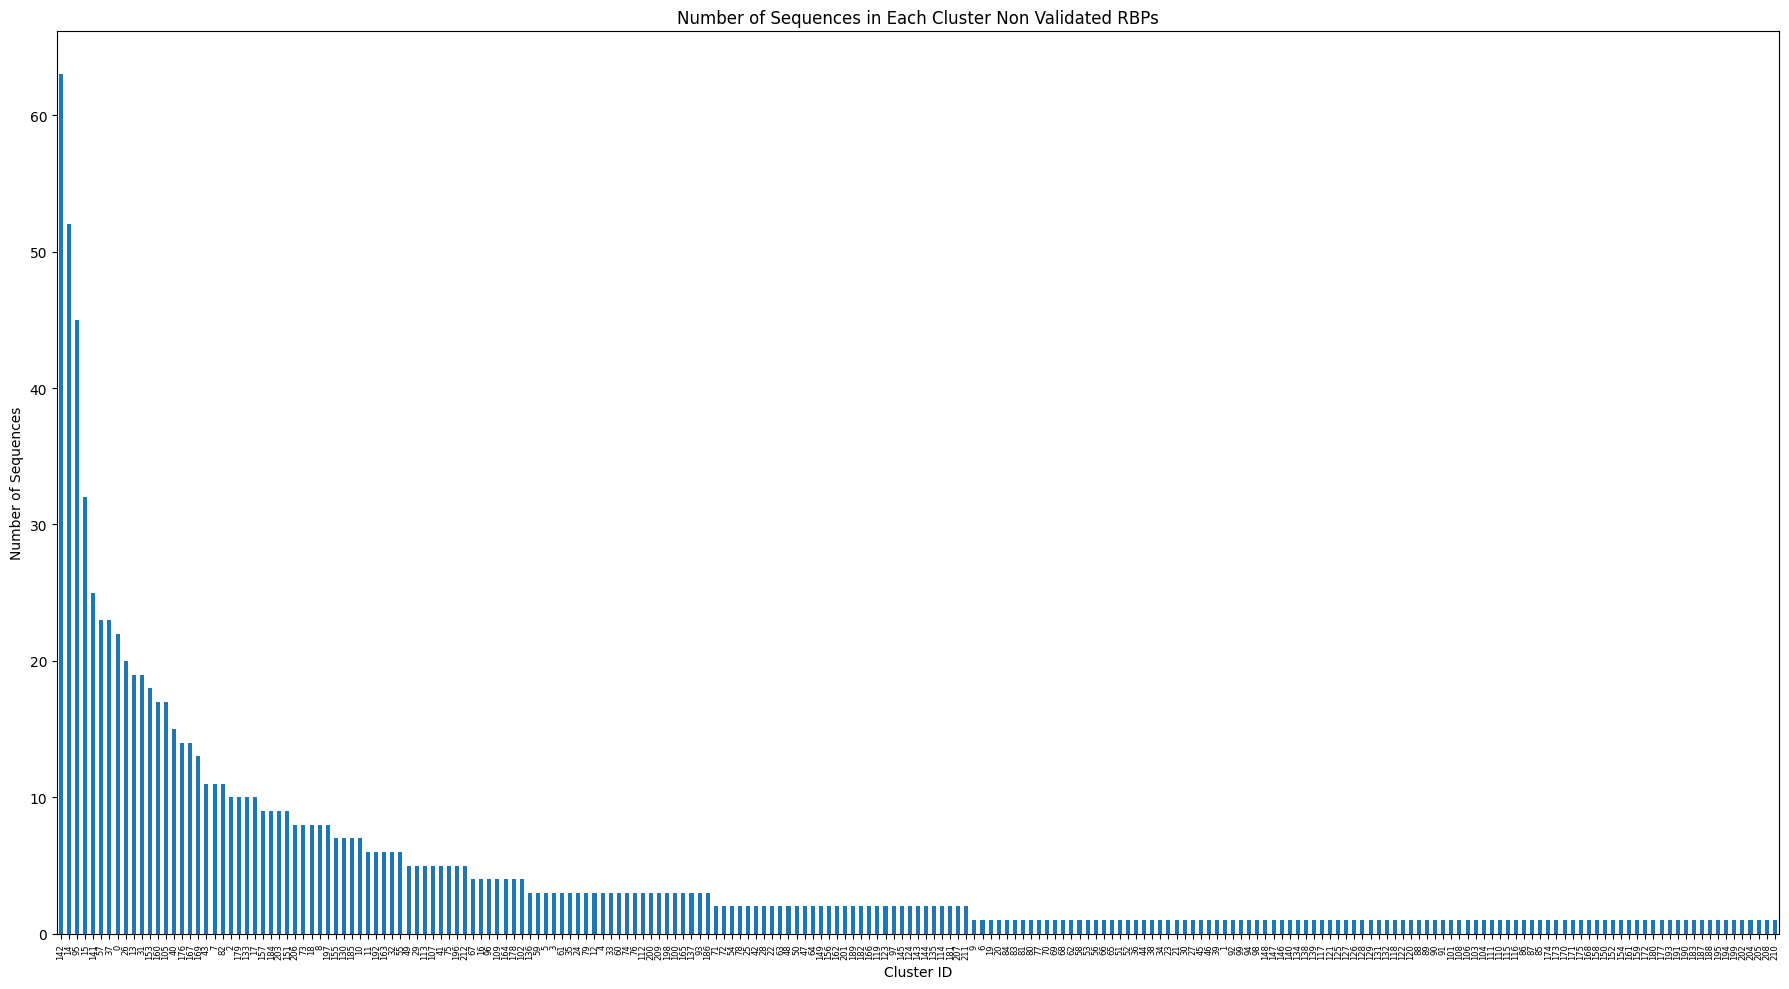

In [92]:
import matplotlib.pyplot as plt

cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(18, 10))
cluster_counts.plot(kind='bar')
plt.title('Number of Sequences in Each Cluster Non Validated RBPs')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Sequences')
plt.xticks(rotation=90, size=6)
plt.tight_layout()
plt.show()


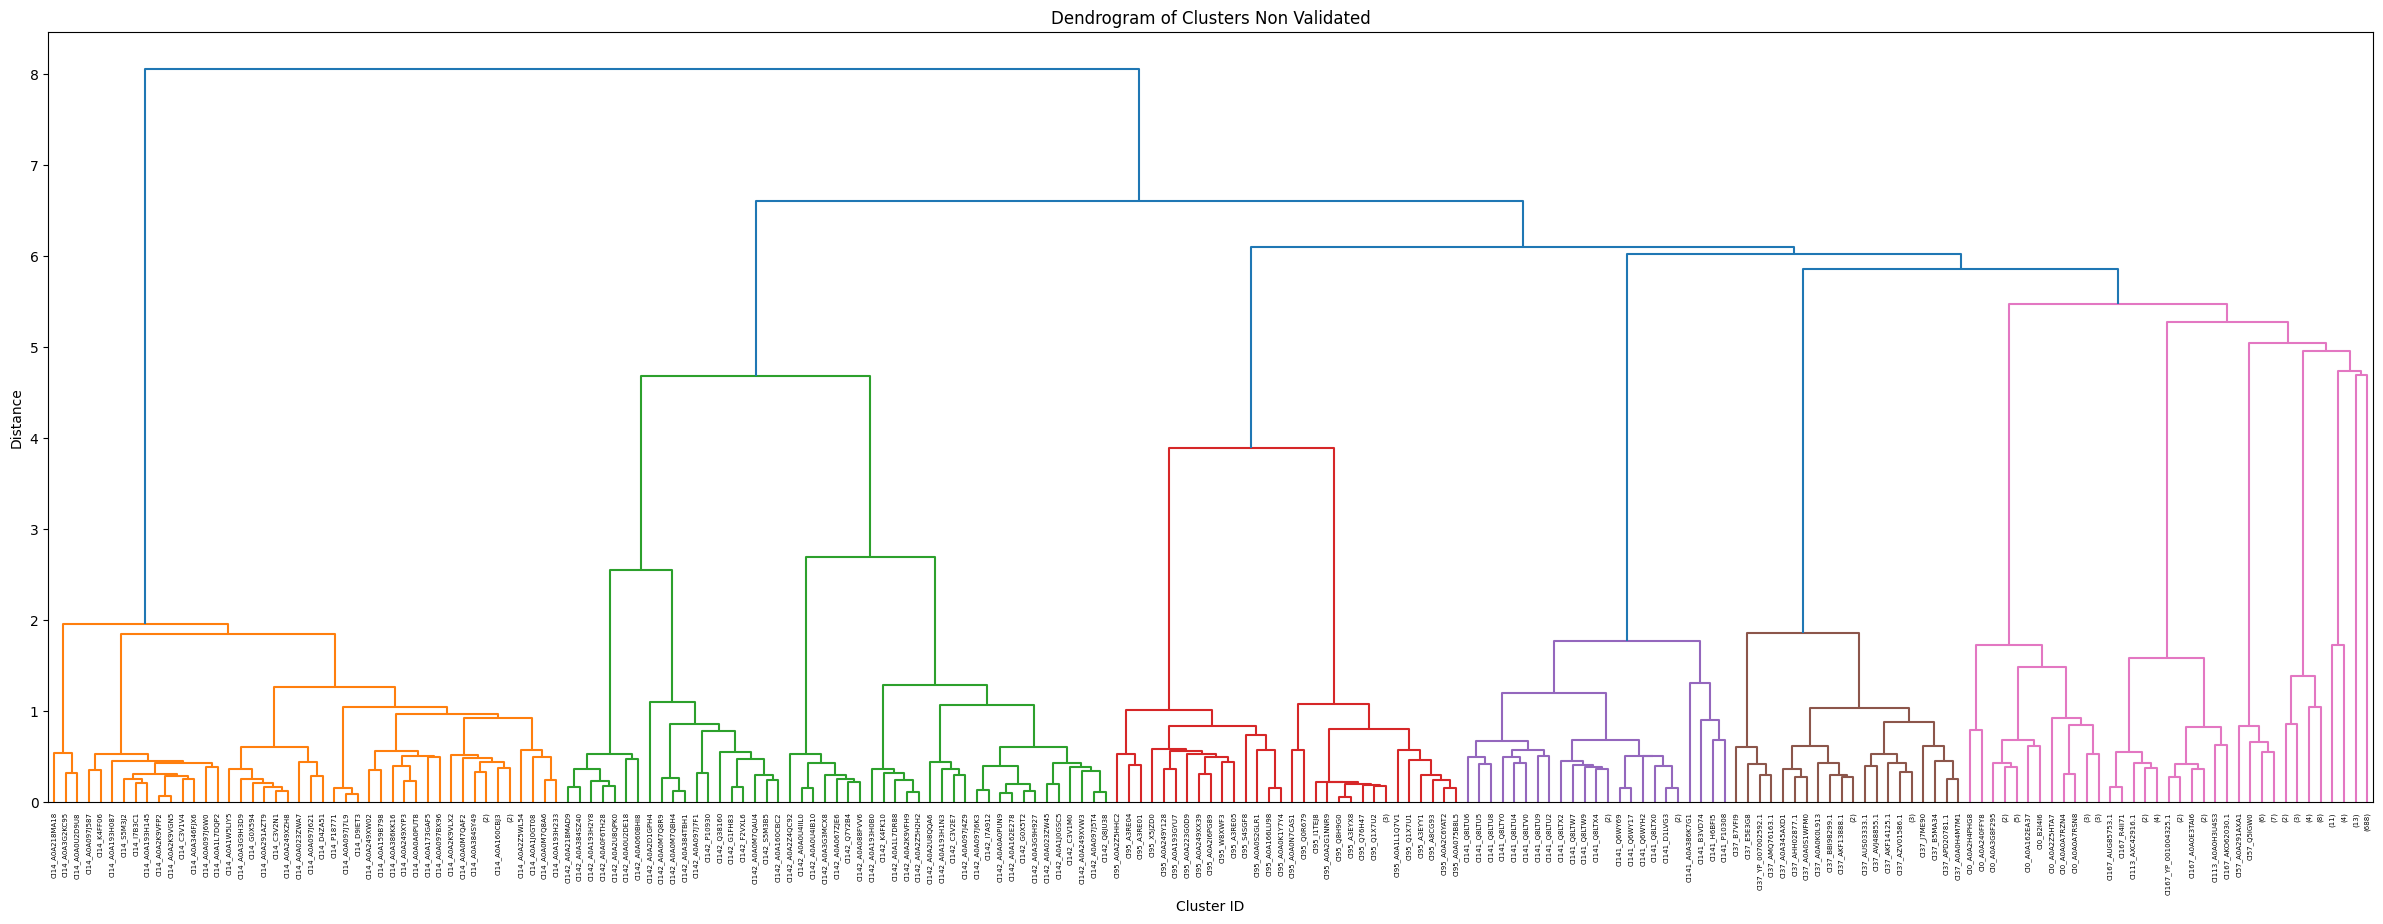

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the sequences using TF-IDF
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 4))
X = vectorizer.fit_transform(sequences)  # This is your feature matrix
# Create a linkage matrix using the actual feature matrix
Z = linkage(X.toarray(), method='ward')  # Convert sparse matrix to dense

plt.figure(figsize=(30, 10))
labels = df.apply(lambda row: f"Cl{row['Cluster']}_{row['Sequence ID']}", axis=1).values
dendrogram(Z, labels=labels, truncate_mode='level', p=10, leaf_rotation=90)
plt.xticks(rotation=90, size=5)
plt.title('Dendrogram of Clusters Non Validated')
plt.xlabel('Cluster ID')
plt.ylabel('Distance')
plt.show()